# Logistic Regression - Predicting Risks

I am interested in finding the best model. But first, I will use default settings. Then, I will use a random grid search to fine tune parameters. Then grid search to narrow down the paramerters I should use. Finally, I will compare this best model to the one produced by the default settings. I am going to try **logistic regression** and **random forest**.

In [2]:
from sklearn.model_selection import train_test_split # to measure within momdel acuracy
from sklearn.preprocessing import StandardScaler # need to scale data for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import osmnx
import pickle
import folium
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy
import time
import geopandas
from scipy import ndimage, interpolate
from photutils.utils import ShepardIDWInterpolator 

In [5]:
# loading data
robbery_model_data_dummies_bal = pandas.read_pickle('C:/Users/jodyn/Google Drive/Insight Data Science/Insight/Processed Data/robbery_model_data_dummies_bal.pkl')
pedestrian_model_data_dummies_bal = pandas.read_pickle('C:/Users/jodyn/Google Drive/Insight Data Science/Insight/Processed Data/pedestrian_model_data_dummies_bal.pkl')

In [25]:
robbery_model_data_dummies_bal

,dyear,dday,ddayofyear,dhour,Hood_ID,Longitude,Latitude,Presence_Absence,Division_D11,Division_D12,...,Division_D33,Division_D41,Division_D42,Division_D43,Division_D51,Division_D52,Division_D53,Division_D54,Division_D55,Mugging
0,2014,6,187,3,139,-79.217850,43.740662,1,0,0,...,0,0,0,1,0,0,0,0,0,0.841128
1,2014,6,187,19,18,-79.504143,43.601009,1,0,0,...,0,0,0,0,0,0,0,0,0,0.811569
2,2014,12,12,22,76,-79.382118,43.659100,1,0,0,...,0,0,0,0,1,0,0,0,0,0.883828
3,2014,20,140,19,58,-79.348290,43.696964,1,0,0,...,0,0,0,0,0,0,0,1,0,0.841088
4,2014,20,140,19,58,-79.348290,43.696964,1,0,0,...,0,0,0,0,0,0,0,1,0,0.841088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,2019,19,212,3,124,-79.235779,43.796328,0,0,0,...,0,0,0,0,0,0,0,0,0,0.314031
10278,2015,16,14,1,50,-79.349284,43.703551,0,0,0,...,0,0,1,0,0,0,0,0,0,0.133369
10279,2018,19,36,21,71,-79.148878,43.742300,0,0,0,...,0,0,1,0,0,0,0,0,0,0.226752
10280,2015,20,168,17,53,-79.284522,43.795091,0,0,0,...,1,0,0,0,0,0,0,0,0,0.664704


In [51]:
pedestrian_model_data_dummies_bal

,YEAR,HOUR,Latitude,Longitude,crossing,give_way,stop,traffic_signals,turning_loop,speed_camera,...,ROAD_CLASS_Minor Arterial,LIGHT_Dark,"LIGHT_Dark, artificial",LIGHT_Dawn,"LIGHT_Dawn, artificial",LIGHT_Daylight,"LIGHT_Daylight, artificial",LIGHT_Dusk,"LIGHT_Dusk, artificial",LIGHT_Other
0,2006,7,43.652892,-79.406253,17.981884,969.579684,60.326632,29.443103,1229.990423,6835.780559,...,0,0,1,0,0,0,0,0,0,0
1,2006,7,43.652892,-79.406253,17.981884,969.579684,60.326632,29.443103,1229.990423,6835.780559,...,0,0,1,0,0,0,0,0,0,0
2,2006,19,43.655145,-79.433590,3.095428,503.854514,35.844610,4.051852,2325.026837,3807.828169,...,0,1,0,0,0,0,0,0,0,0
3,2006,19,43.655145,-79.433590,3.095428,503.854514,35.844610,4.051852,2325.026837,3807.828169,...,0,1,0,0,0,0,0,0,0,0
4,2006,22,43.777056,-79.347858,6.696265,847.166243,153.802302,7.466501,2883.840549,13630.191961,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12759,2007,22,43.836693,-79.302868,356.812078,2345.295865,490.014227,356.910494,2331.446094,18779.906013,...,0,0,0,0,0,0,0,0,1,0
12760,2016,15,43.806733,-79.212209,170.878482,1299.369459,45.896940,78.032306,115.701347,28620.660776,...,0,0,0,0,0,0,1,0,0,0
12761,2018,19,43.688603,-79.595672,34.773621,38.725278,96.563957,36.574360,120.075875,10394.656798,...,1,0,1,0,0,0,0,0,0,0
12762,2006,18,43.770122,-79.267954,93.886291,831.296267,85.218211,163.521124,951.179175,22375.682163,...,1,0,0,0,0,0,0,1,0,0


In [64]:
# Labels are the values we want to predict
robbery_labels = robbery_model_data_dummies_bal['Presence_Absence']
robbery_features = robbery_model_data_dummies_bal.drop(['Presence_Absence','Latitude', 'Longitude'], axis = 1)
robbery_model_names = list(robbery_model_data_dummies_bal.drop(['Presence_Absence','Latitude', 'Longitude'], axis = 1)) 
pedestrian_labels = pedestrian_model_data_dummies_bal['Presence_Absence']
pedestrian_features = pedestrian_model_data_dummies_bal.drop(['Presence_Absence','Latitude', 'Longitude'], axis = 1)
pedestrian_features_names = list(pedestrian_model_data_dummies_bal.drop(['Presence_Absence','Latitude', 'Longitude'], axis = 1))
# Split the data into training and testing sets
robbery_train, robbery_test, robbery_presence_train, robbery_presence_test = train_test_split(
    robbery_features,robbery_labels, test_size=0.3, random_state=42)
pedestrian_train, pedestrian_test, pedestrian_presence_train, pedestrian_presence_test = train_test_split(
    pedestrian_features,pedestrian_labels, test_size=0.3, random_state=42)

In [53]:
robbery_model_names

['dyear',
 'dday',
 'ddayofyear',
 'dhour',
 'Hood_ID',
 'Division_D11',
 'Division_D12',
 'Division_D13',
 'Division_D14',
 'Division_D22',
 'Division_D23',
 'Division_D31',
 'Division_D32',
 'Division_D33',
 'Division_D41',
 'Division_D42',
 'Division_D43',
 'Division_D51',
 'Division_D52',
 'Division_D53',
 'Division_D54',
 'Division_D55']

In [54]:
pedestrian_features_names

['YEAR',
 'HOUR',
 'crossing',
 'give_way',
 'stop',
 'traffic_signals',
 'turning_loop',
 'speed_camera',
 'ROAD_CLASS_Collector',
 'ROAD_CLASS_Expressway',
 'ROAD_CLASS_Local',
 'ROAD_CLASS_Major Arterial',
 'ROAD_CLASS_Minor Arterial',
 'LIGHT_Dark',
 'LIGHT_Dark, artificial',
 'LIGHT_Dawn',
 'LIGHT_Dawn, artificial',
 'LIGHT_Daylight',
 'LIGHT_Daylight, artificial',
 'LIGHT_Dusk',
 'LIGHT_Dusk, artificial',
 'LIGHT_Other']

In [7]:
# Scale data for logistic regression
scaler = StandardScaler()
robbery_train_lr = pandas.DataFrame(scaler.fit_transform(robbery_train),
                                   columns=robbery_model_names)

robbery_test_lr = pandas.DataFrame(scaler.fit_transform(robbery_test),
                                  columns=robbery_model_names)

scaler = StandardScaler()
pedestrian_train_lr = pandas.DataFrame(scaler.fit_transform(pedestrian_train),
                                   columns=pedestrian_features_names)

pedestrian_test_lr = pandas.DataFrame(scaler.fit_transform(pedestrian_test),
                                  columns=pedestrian_features_names)

In [5]:
# Time to build the base model
robbery_model_LR = LogisticRegression()
robbery_model_LR.fit(robbery_train_lr, robbery_presence_train)
robbery_model_prediction_LR = robbery_model_LR.predict(robbery_test_lr)

pedestrian_model_LR = LogisticRegression()
pedestrian_model_LR.fit(pedestrian_train_lr, pedestrian_presence_train)
pedestrian_model_prediction_LR = pedestrian_model_LR.predict(pedestrian_test_lr)

In [6]:
# how did these models perform?
print(classification_report(robbery_presence_test, robbery_model_prediction_LR))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60      1512
           1       0.61      0.56      0.58      1573

    accuracy                           0.59      3085
   macro avg       0.59      0.59      0.59      3085
weighted avg       0.59      0.59      0.59      3085



In [7]:
print(classification_report(pedestrian_presence_test, pedestrian_model_prediction_LR))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1885
           1       0.93      0.94      0.93      1945

    accuracy                           0.93      3830
   macro avg       0.93      0.93      0.93      3830
weighted avg       0.93      0.93      0.93      3830



## Random Forest

In [8]:
# Time to build the base model
robbery_model_RF = RandomForestClassifier()
robbery_model_RF.fit(robbery_train, robbery_presence_train)
robbery_model_prediction_RF = robbery_model_RF.predict(robbery_test)
print(classification_report(robbery_presence_test,robbery_model_prediction_RF))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1512
           1       0.90      0.94      0.92      1573

    accuracy                           0.92      3085
   macro avg       0.92      0.92      0.92      3085
weighted avg       0.92      0.92      0.92      3085



In [9]:
# Time to build the base model
pedestrian_model_RF = RandomForestClassifier()
pedestrian_model_RF.fit(pedestrian_train, pedestrian_presence_train)
pedestrian_model_prediction_RF = pedestrian_model_RF.predict(pedestrian_test)
print(classification_report(pedestrian_presence_test,pedestrian_model_prediction_RF))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1885
           1       0.96      0.97      0.96      1945

    accuracy                           0.96      3830
   macro avg       0.96      0.96      0.96      3830
weighted avg       0.96      0.96      0.96      3830



# Model Tuning

## Logistic Regression

In [76]:
# Create first pipeline for base without reducing features.
pipe_lr = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid_lr = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : numpy.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

In [62]:
# Create grid search object
grid_search_lr = GridSearchCV(pipe_lr, param_grid = param_grid_lr, cv = 5, verbose=True, n_jobs=-1)

start_time = time.time()

# Fit on data
robbery_best_lr = grid_search_lr.fit(robbery_train_lr, robbery_presence_train)
print("Best: %f using %s" % (robbery_best_lr.best_score_, robbery_best_lr.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    4.7s remaining:    0.3s


Best: 0.614982 using {'classifier': LogisticRegression(C=0.004832930238571752, penalty='l1', solver='liblinear'), 'classifier__C': 0.004832930238571752, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Execution time: 5.251265525817871 ms


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.0s finished


In [76]:
start_time = time.time()
pedestrian_best_lr = grid_search_lr.fit(pedestrian_train_lr, pedestrian_presence_train)
print("Best: %f using %s" % (pedestrian_best_lr.best_score_, pedestrian_best_lr.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    3.5s remaining:    0.2s


Best: 0.891426 using {'classifier': LogisticRegression(C=4.281332398719396, solver='liblinear'), 'classifier__C': 4.281332398719396, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Execution time: 4.1199870109558105 ms


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.9s finished


In [10]:
# does this model perform better?
pedestrian_model_best_LR = LogisticRegression(penalty='l2', C = 4.281332398719396, solver='liblinear', 
                                              max_iter=500)
pedestrian_model_best_LR.fit(pedestrian_train_lr, pedestrian_presence_train)
pedestrian_model_prediction_best_LR = pedestrian_model_best_LR.predict(pedestrian_test_lr)
# how did these models perform?
print(classification_report(pedestrian_presence_test, pedestrian_model_prediction_best_LR))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1885
           1       0.93      0.94      0.93      1945

    accuracy                           0.93      3830
   macro avg       0.93      0.93      0.93      3830
weighted avg       0.93      0.93      0.93      3830



In [11]:
# does this model perform better?
robbery_model_best_LR = LogisticRegression(penalty='l1', C = 0.004832930238571752, solver='liblinear', 
                                              max_iter=500)
robbery_model_best_LR.fit(robbery_train_lr, robbery_presence_train)
robbery_model_prediction_best_LR = robbery_model_best_LR.predict(robbery_test_lr)
# how did these models perform?
print(classification_report(robbery_presence_test, robbery_model_prediction_best_LR))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1512
           1       0.62      0.65      0.63      1573

    accuracy                           0.62      3085
   macro avg       0.62      0.62      0.62      3085
weighted avg       0.62      0.62      0.62      3085



## Random Forest

In [14]:
# Create first pipeline for base without reducing features.
pipe_rf = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid_rf = [
     {
    'classifier__bootstrap': [True],
    'classifier__max_depth': [80, 90, 100, 110],
    'classifier__max_features': [2, 3],
    'classifier__min_samples_leaf': [3, 4, 5],
    'classifier__min_samples_split': [8, 10, 12],
    'classifier__n_estimators': [100, 200, 300, 1000]
}
]

random_grid_rf = {'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
               'classifier__max_features': ['auto', 'sqrt'],
               'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'classifier__min_samples_split': [1, 2, 4],
               'classifier__min_samples_leaf': [2, 5, 10],
               'classifier__bootstrap': [True]}

grid_search_rf = GridSearchCV(pipe_rf, param_grid = param_grid_rf, cv = 3, n_jobs = -1, verbose = 2)

random_grid_search_rf = RandomizedSearchCV(pipe_rf, param_distributions = random_grid_rf, n_iter = 100, cv = 3,
                                           verbose=2, random_state=42, n_jobs = -1)

In [64]:
# Fit on data
start_time = time.time()
robbery_best_rf = grid_search_rf.fit(robbery_train, robbery_presence_train)
print("Best: %f using %s" % (robbery_best_rf.best_score_, robbery_best_rf.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')
#robbery_best_rf_random = random_grid_search_rf.fit(robbery_train, robbery_presence_train)
#print("Best: %f using %s" % (robbery_best_rf_random.best_score_, robbery_best_rf_random.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.8min finished


Best: 0.897179 using {'classifier__bootstrap': True, 'classifier__max_depth': 80, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 1000}
Execution time: 414.94893050193787 ms


In [16]:
start_time = time.time()
pedestrian_best_rf = grid_search_rf.fit(pedestrian_train, pedestrian_presence_train)
print("Best: %f using %s" % (pedestrian_best_rf.best_score_, pedestrian_best_rf.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

#start_time = time.time()
#pedestrian_best_rf_random = random_grid_search_rf.fit(pedestrian_train, pedestrian_presence_train)
#print("Best: %f using %s" % (pedestrian_best_rf_random.best_score_, pedestrian_best_rf_random.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.8min finished


Best: 0.931386 using {'classifier__bootstrap': True, 'classifier__max_depth': 110, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 100}
Execution time: 591.2980108261108 ms


In [8]:
# does this model perform better?
pedestrian_model_best_RF = RandomForestClassifier(bootstrap= True, max_depth = 110, 
                                                  max_features= 3, min_samples_leaf = 8,
                                                  min_samples_split = 8, n_estimators = 100)
pedestrian_model_best_RF.fit(pedestrian_train, pedestrian_presence_train)
pedestrian_model_prediction_best_RF = pedestrian_model_best_RF.predict(pedestrian_test)
# how did these models perform?
print(classification_report(pedestrian_presence_test, pedestrian_model_prediction_best_RF))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1885
           1       0.95      0.96      0.95      1945

    accuracy                           0.95      3830
   macro avg       0.95      0.95      0.95      3830
weighted avg       0.95      0.95      0.95      3830



In [65]:
# does this model perform better?
robbery_model_best_RF = RandomForestClassifier(bootstrap= True, max_depth = 80, 
                                                  max_features= 3, min_samples_leaf = 3,
                                                  min_samples_split = 8, n_estimators = 1000)
robbery_model_best_RF.fit(robbery_train, robbery_presence_train)
robbery_model_prediction_best_RF = robbery_model_best_RF.predict(robbery_test)
# how did these models perform?
print(classification_report(robbery_presence_test, robbery_model_prediction_best_RF))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1512
           1       0.91      0.93      0.92      1573

    accuracy                           0.92      3085
   macro avg       0.92      0.92      0.92      3085
weighted avg       0.92      0.92      0.92      3085



Now that I have a pretty good model, my next step is to make AUC plots and assess the how features compared in their relative importance.

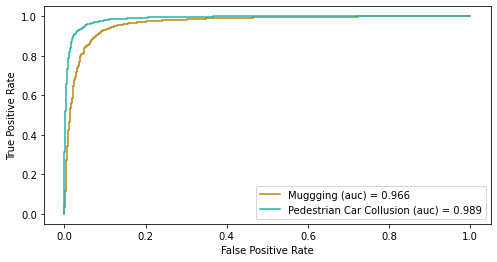

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#import scikitplot as skplt
import matplotlib.pyplot as plt

robbery_pred_proba = robbery_model_best_RF.predict_proba(robbery_test)[::,1]
fpr_r, tpr_r, _ = metrics.roc_curve(robbery_presence_test,  robbery_pred_proba)
auc_r = metrics.roc_auc_score(robbery_presence_test, robbery_pred_proba)

pedestrian_pred_proba = pedestrian_model_best_RF.predict_proba(pedestrian_test)[::,1]
fpr_p, tpr_p, _ = metrics.roc_curve(pedestrian_presence_test,  pedestrian_pred_proba)
auc_p = metrics.roc_auc_score(pedestrian_presence_test, pedestrian_pred_proba)

figure, ax = plt.subplots(1, figsize=(8, 4))
ax.plot(fpr_r,tpr_r,label="Muggging (auc) = "+str(round(auc_r,3)), color = "darkgoldenrod")
ax.plot(fpr_p,tpr_p,label="Pedestrian Car Collusion (auc) = "+str(round(auc_p,3)), color = "lightseagreen")
ax.set_xlabel('False Positive Rate', fontsize=10)
ax.set_ylabel('True Positive Rate', fontsize=10)
plt.legend(loc=4)
save_results_to = 'C:/Users/jodyn/PycharmProjects/InsightFDS/notebooks/figures/'
plt.savefig(save_results_to + 'AUC.png', dpi = 300)

In [114]:
importance_pedestrian = pedestrian_model_best_RF.feature_importances_

pedestrian_x_names = ("Year", "Hour of Day", " Crossing Distance", "Give-way Distance", " Stop Distance",
                         "Traffic Signal Distance", " Turning Loop Distance", " Speed Camera Distance",
                         " Collector Road", " Expressway Road", " Local Road", " Major Arterial Road",
                         " Minor Arterial Road", " Dark Lighting", " Artificial Dark", "Dawn", " Artificial Dawn",
                         " Daylight", "Artificial Daylight", " Dusk", " Artificial Dusk", " Other Artificial Lighting")


In [67]:
importance_robbery = robbery_model_best_RF.feature_importances_

robbery_x_names = ("Year", "Day of Month", " Day of Year", "Hour of Day","ID",  " Divison 11",
                         "Divison 12", " Divison 13", " Divison 14",
                         "Divison 22", " Divison 23", "Divison 31", "Divison 32",
                         "Divison 33", "Divison 41", "Divison 42", "Divison 43", "Divison 51",
                         "Divison 52", "Divison 53", " Divison 54", "Divison 55")

In [47]:
len(importance_pedestrian)

22

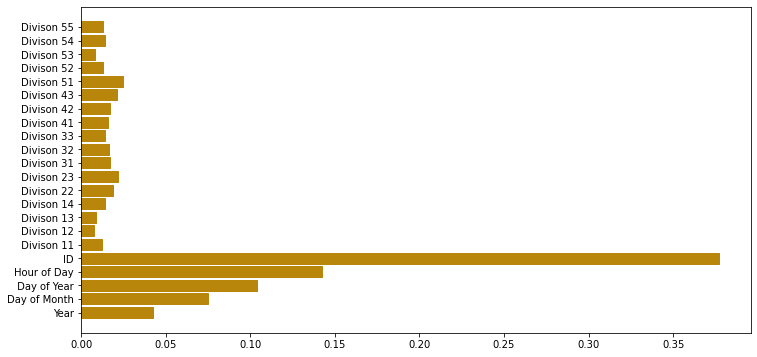

In [133]:
import matplotlib.pyplot as plt

figure, ax = plt.subplots(1, figsize=(12, 6))
ax.barh(robbery_x_names,importance_robbery, color = "darkgoldenrod", ec="darkgoldenrod")
save_results_to = 'C:/Users/jodyn/PycharmProjects/InsightFDS/notebooks/figures/'
plt.savefig(save_results_to + 'Feature-Importance_Mug.png', dpi = 300)

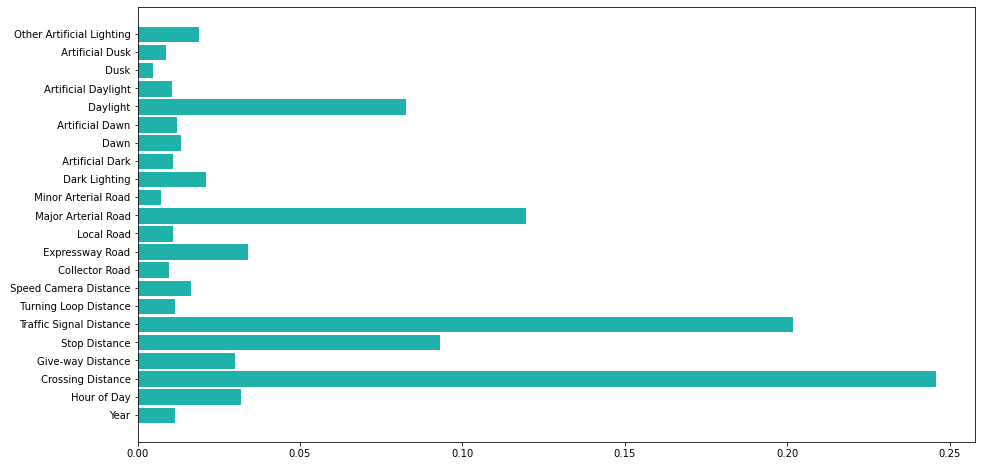

In [134]:
figure, ax = plt.subplots(1, figsize=(15, 8))
ax.barh(pedestrian_x_names,importance_pedestrian, color = "lightseagreen", ec="lightseagreen")
save_results_to = 'C:/Users/jodyn/PycharmProjects/InsightFDS/notebooks/figures/'
plt.savefig(save_results_to + 'Feature-Importance_Car.png', dpi = 300)

# Predicting Risks - Random Forest

In [14]:
# I am going to run this on the full dataset
# and select the features in this final model
pedestrian_features_final = pandas.DataFrame(pedestrian_features,
                                          columns=pedestrian_features_names)
robbery_features_final = pandas.DataFrame(robbery_features,
                                          columns=robbery_model_names)

In [15]:
# will add these data to the main dataframe
pedestrian_model_data_dummies_bal['Collison'] = pandas.DataFrame((pedestrian_model_best_RF.predict_proba(pedestrian_features_final)))[1]

robbery_model_data_dummies_bal['Mugging'] = pandas.DataFrame((robbery_model_best_RF.predict_proba(robbery_features_final)))[1]


In [16]:
list(robbery_model_data_dummies_bal.iloc[:, numpy.r_[5,6,25]])

['Longitude', 'Latitude', 'Mugging']

In [17]:
list(pedestrian_model_data_dummies_bal.iloc[:, numpy.r_[2:4,25]])

['Latitude', 'Longitude', 'Collison']

In [18]:
robbery_model_nodes = robbery_model_data_dummies_bal.iloc[:, numpy.r_[5,6,25]]
pedestrian_model_nodes = pedestrian_model_data_dummies_bal.iloc[:, numpy.r_[2:4,25]]

In [22]:
def create_gdf(df, Longitude, Latitude, projection):
    return geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df[Longitude], df[Latitude]),
                                  crs=projection)

# need as a geopanda dataframe to append to nodes
pedestrian_model_nodes_4326 = create_gdf(pedestrian_model_nodes,                                      
                                      Longitude='Longitude',
                                      Latitude='Latitude',
                                      projection="EPSG:4326")

pedestrian_model_nodes_2958 = pedestrian_model_nodes_4326.to_crs(epsg=2958) 

In [23]:
robbery_model_nodes_4326 = create_gdf(robbery_model_nodes,
                                      Longitude='Longitude',
                                      Latitude='Latitude',
                                      projection="EPSG:4326")
robbery_model_nodes_2958 = robbery_model_nodes_4326.to_crs(epsg=2958) 

In [30]:
robbery_model_nodes_2958.to_pickle("C:/Users/jodyn/Google Drive/Insight/Processed Data/robbery_model_nodes_2958.pkl")
pedestrian_model_nodes_2958.to_pickle("C:/Users/jodyn/Google Drive/Insight/Processed Data/pedestrian_model_nodes_2958.pkl")

Juptyter crashed when I tried to do the edge weights in here. So, I wil finish in PyCharm.